<a href="https://colab.research.google.com/github/kimayeon-hub/DeepLearning1/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sign language MNIST 데이터셋을 사용해서 딥러닝으로 학습시키기
- kaggle에서 `sign language MNIST` datasets 다운받기
  - 이미지의 픽셀 값들이 쭉 들어있음

## 데이터 전처리 및 모델 만들기

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

In [ ]:
train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [ ]:
# 결과 값과 입력 값으로 나누기
train_y = np.array(train_data)[:, 0]
train_x = np.array(train_data)[:, 1: ]
test_y = np.array(test_data)[:, 0]
test_x = np.array(test_data)[:, 1: ]

In [ ]:
train_y

array([ 3,  6,  2, ..., 18, 17, 23])

In [ ]:
train_x

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]])

In [ ]:
train_x.shape

(27455, 784)

In [ ]:
# 입력값은 이미지이므로 입력값을 3차원으로 변경
train_x = np.reshape(train_x, (train_x.shape[0], 28, 28, 1))
test_x = np.reshape(test_x, (test_x.shape[0], 28, 28, 1))

In [ ]:
train_x.shape

(27455, 28, 28, 1)

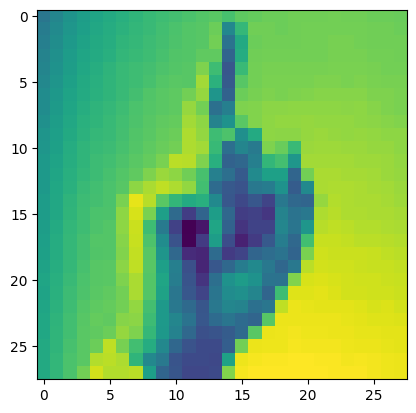

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_x[0,:,:,0])

In [ ]:
train_y[0]

np.int64(3)

In [ ]:
# train 결과 값을 범주형으로 사용해야 하므로 one-hot encoding
import keras
train_y = keras.utils.to_categorical(train_y)

In [ ]:
train_y.shape

(27455, 25)

In [ ]:
# 모델 만들기
from keras.models import Sequential
from keras import layers
from keras import optimizers

model = Sequential()
model.add(layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=25, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
# 모델 학습시키기
model.fit(train_x, train_y, epochs=10, batch_size=64, validation_split=0.3)

Epoch 1/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.5102 - loss: 15.1483 - val_accuracy: 0.8758 - val_loss: 0.5065
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9913 - loss: 0.0405 - val_accuracy: 0.9998 - val_loss: 0.0018
Epoch 3/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.9973 - loss: 0.0127 - val_accuracy: 0.9983 - val_loss: 0.0042
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - accuracy: 0.9991 - loss: 0.0047 - val_accuracy: 0.9999 - val_loss: 6.4453e-04
Epoch 5/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9983 - loss: 0.0089 - val_accuracy: 0.9998 - val_loss: 6.6202e-04
Epoch 6/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.9992 - loss: 0.0043 - val_accuracy: 0.9999 - val_loss: 5.1404e-04
Epoch 7/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.9994 - loss: 0.0021 - val_accuracy: 0.9999 - val_loss: 2.1600e-04
Epoch 8/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.9986 

In [ ]:
# 모델 테스트하기
o = model.predict(test_x)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


## 모델 평가

In [ ]:
# 모델의 예측값을 수치형으로 바꾸기
o = np.argmax(o, -1)

### accuracy
- accuracy = TP / T
  - T: total

In [ ]:
np.sum(o == test_y) / o.shape[0]

np.float64(0.8386781929726715)

### confusion matrix
- TP: positive(맞다)라고 예측했는데 맞다(True)
- FP: positive라고 예측했는데 틀렸다(False)
- TN: negative(아니다)라고 예측했는데 True
- FN: negative라고 예측했는데 False

> FN의 값이 중요 <br>
> FN의 값을 극단적으로 0으로 낮추면, 모두 Positive로 예측하면 됨 -> 신뢰성 떨어짐


> FN과 FP가 0인게 가장 좋은 것


In [ ]:
cm = np.zeros((25, 25))
for i in range(o.shape[0]):
  cm[test_y[i], o[i]] += 1

In [ ]:
cm

array([[331.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0., 432.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0., 310.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0., 240.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 498.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 247.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  

### 값이 3개 이상일 때, confusin matrix 만드는 방법
- 기준 값을 잡기
  - 기준 값으로 예측하면 Positives

### precision
- precision = TP / (TP + FP)  
> FP가 작아지면 precision이 커짐

### recall
- recall = TP / (TP + FN)
> FN이 작아지면 recall이 커짐